**<a src="https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020">IPL Complete Dataset (2008-2020)</a>**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv('dataset/IPL Matches 2008-2020.csv')

In [3]:
matches.head()

id        city        date player_of_match  \
0  335982   Bangalore  2008-04-18     BB McCullum   
1  335983  Chandigarh  2008-04-19      MEK Hussey   
2  335984       Delhi  2008-04-19     MF Maharoof   
3  335985      Mumbai  2008-04-20      MV Boucher   
4  335986     Kolkata  2008-04-20       DJ Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   
2                            Feroz Shah Kotla              0   
3                            Wankhede Stadium              0   
4                                Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field        Kolkata Knight Riders   
1          Chennai Super Kings           bat          Chennai Super Kings   
2             Rajasthan Royals           bat             Delhi Daredevils   
3               Mumbai Indians           bat  Royal Challengers Bangalore   
4              Deccan Chargers           bat        Kolkata Knight Riders   

    result  result_margin eliminator method    umpire1         umpire2  
0     runs          140.0          N    NaN  Asad Rauf     RE Koertzen  
1     runs           33.0          N    NaN  MR Benson      SL Shastri  
2  wickets            9.0          N    NaN  Aleem Dar  GA Pratapkumar  
3  wickets            5.0          N    NaN   SJ Davis       DJ Harper  
4  wickets            5.0          N    NaN  BF Bowden     K Hariharan

In [4]:
sns.set_style('darkgrid')

### **List down all teams name**

In [5]:
matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [6]:
matches.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True)

**How many teams played in IPL from 2008 to 2020**

In [7]:
matches['team1'].nunique()

14

### **List down those teams, who are win the toss, but choose field first!**

In [8]:
choose_field=matches[matches['toss_decision']=='field'][['toss_winner','team1','team2','toss_decision','winner']]

In [9]:
choose_field.head()

toss_winner                        team1  \
0   Royal Challengers Bangalore  Royal Challengers Bangalore   
7                Mumbai Indians          Chennai Super Kings   
8              Rajasthan Royals              Deccan Chargers   
9                Mumbai Indians              Kings XI Punjab   
10             Rajasthan Royals  Royal Challengers Bangalore   

                    team2 toss_decision                 winner  
0   Kolkata Knight Riders         field  Kolkata Knight Riders  
7          Mumbai Indians         field    Chennai Super Kings  
8        Rajasthan Royals         field       Rajasthan Royals  
9          Mumbai Indians         field        Kings XI Punjab  
10       Rajasthan Royals         field       Rajasthan Royals

**Create graph for these teams, who win the matches, even they took the field first after win the toss**

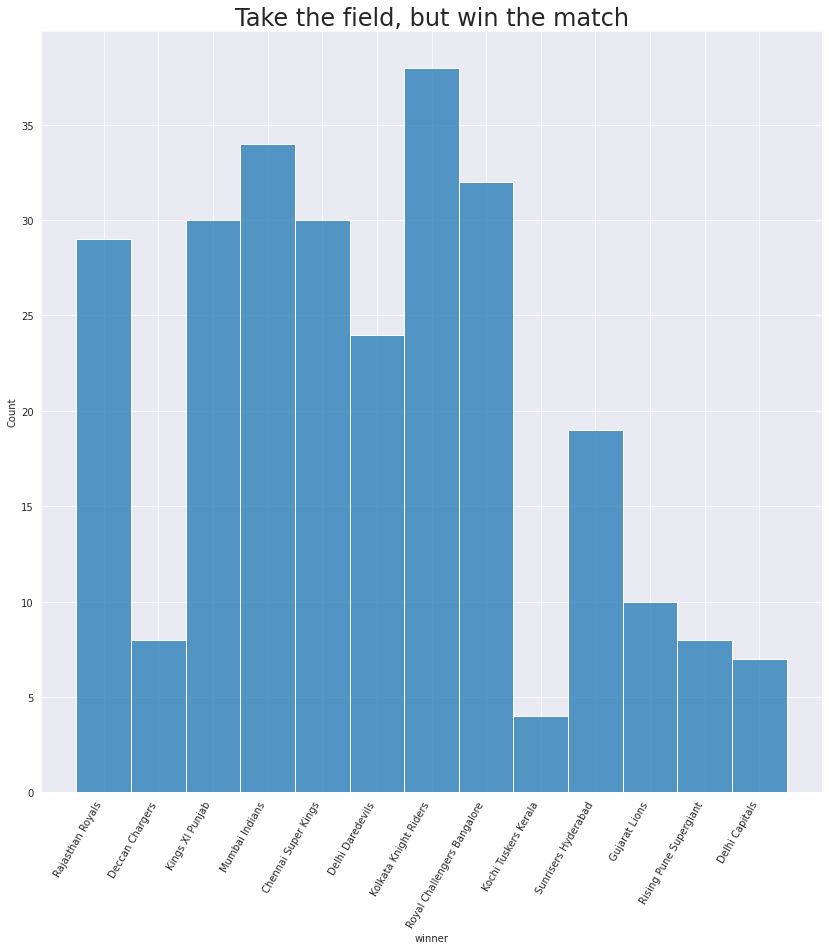

In [10]:
fig,ax = plt.subplots(figsize=(14,14))
sns.set_context('notebook', font_scale=2)

team = choose_field[choose_field['toss_winner']==choose_field['winner']]
sns.histplot(team['winner'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=60, horizontalalignment='right')
plt.title('Take the field, but win the match')
plt.show()

**Create graph for these teams, who loss the matches, even they took the field first after win the toss**

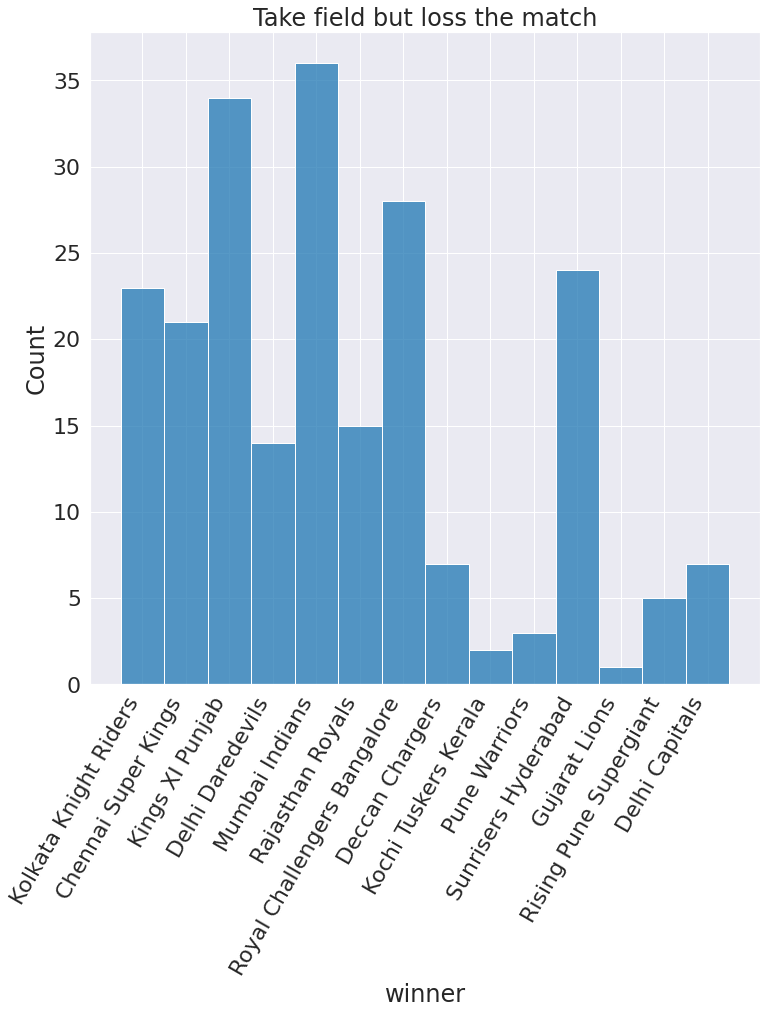

In [11]:
fig,ax = plt.subplots(figsize=(12,12))
sns.set_context('notebook',font_scale=2)

team = choose_field[choose_field['toss_winner']!=choose_field['winner']]
sns.histplot(team['winner'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=60, horizontalalignment='right')
plt.title('Take field but loss the match')
plt.show()

### **Which team most time win the toss, but take the field first**

In [12]:
matches[matches['toss_decision']=='field']['toss_winner'].value_counts()

Kolkata Knight Riders          64
Royal Challengers Bangalore    63
Mumbai Indians                 58
Kings XI Punjab                58
Rajasthan Royals               53
Delhi Daredevils               51
Chennai Super Kings            46
Sunrisers Hyderabad            33
Deccan Chargers                19
Gujarat Lions                  14
Delhi Capitals                 13
Rising Pune Supergiant         10
Pune Warriors                   9
Kochi Tuskers Kerala            5
Name: toss_winner, dtype: int64

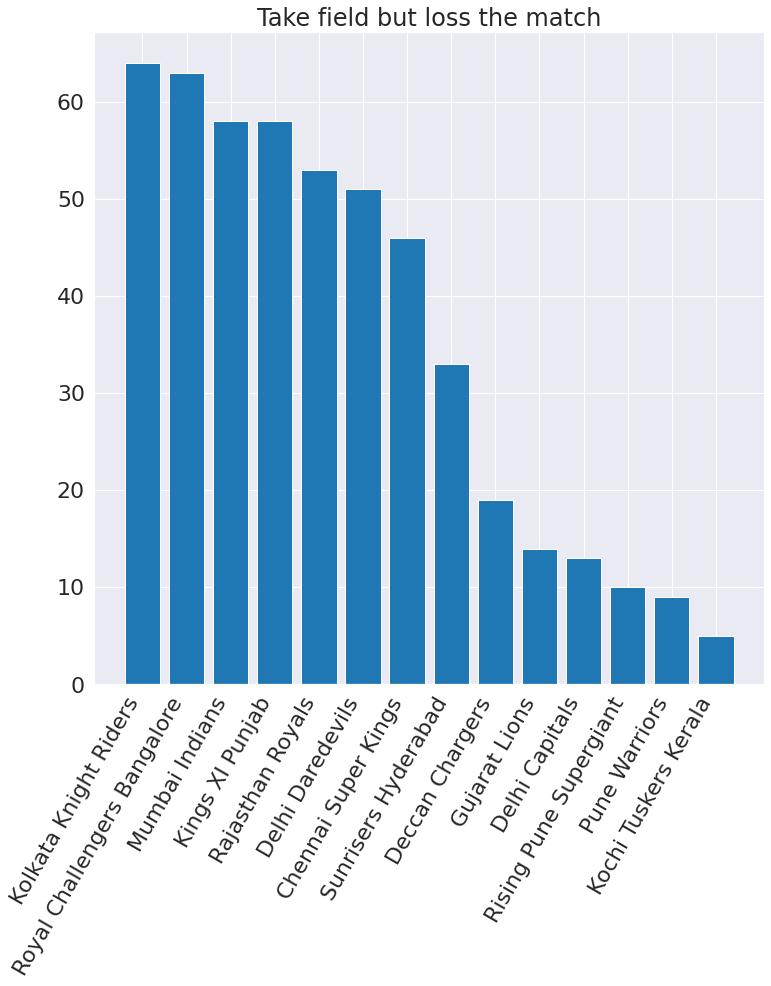

In [13]:
fig,ax = plt.subplots(figsize=(12,12))

team = matches[matches['toss_decision']=='field']['toss_winner'].value_counts()
ax.bar(team.index,team)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=60, horizontalalignment='right')
plt.title('Take field but loss the match')
plt.show()

In [14]:
matches[matches['toss_decision']=='field']['toss_winner'].value_counts().index.values[0]

'Kolkata Knight Riders'

**Create graph for these teams, who win the matches, even they took the bat first after loss the toss**

In [15]:
loss_toss=matches[matches['toss_decision']=='field'][['toss_winner','team1','team2','toss_decision','winner','result']]

In [16]:
winner_team = loss_toss[(loss_toss['team2'] == loss_toss['winner']) & (loss_toss['result']=='runs')]

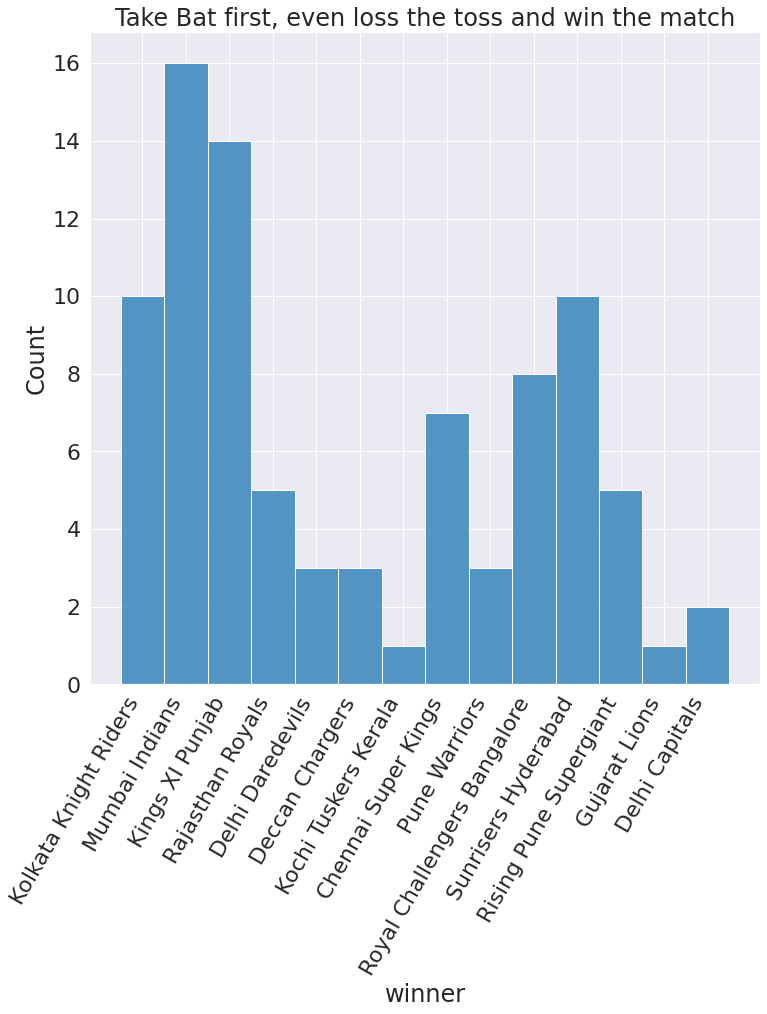

In [17]:
fig,ax = plt.subplots(figsize=(12,12))
sns.histplot(winner_team['winner'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=60, horizontalalignment='right')
plt.title('Take Bat first, even loss the toss and win the match')
plt.show()

### **Which team most time take the bat first after win the toss**

In [18]:
matches[matches['toss_decision'] == 'bat']['toss_winner'].value_counts()

Chennai Super Kings            51
Mumbai Indians                 48
Rajasthan Royals               34
Kolkata Knight Riders          34
Delhi Daredevils               29
Kings XI Punjab                27
Deccan Chargers                24
Royal Challengers Bangalore    24
Sunrisers Hyderabad            24
Pune Warriors                  11
Delhi Capitals                  7
Kochi Tuskers Kerala            3
Rising Pune Supergiant          3
Gujarat Lions                   1
Name: toss_winner, dtype: int64

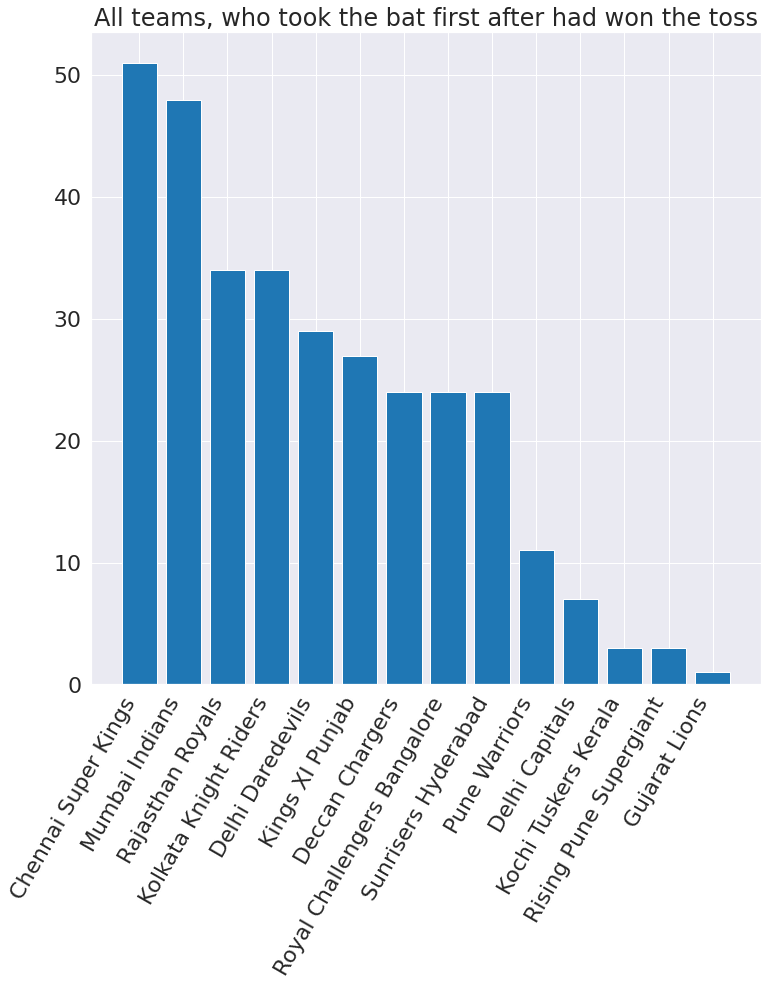

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

team = matches[matches['toss_decision'] == 'bat']['toss_winner']
ax.bar(team.value_counts().index, team.value_counts())

label = ax.get_xticklabels()
plt.setp(label, rotation=60, horizontalalignment='right')
plt.title('All teams, who took the bat first after had won the toss')
plt.show()

In [ ]:
matches.head()

id        city        date player_of_match  \
0  335982   Bangalore  2008-04-18     BB McCullum   
1  335983  Chandigarh  2008-04-19      MEK Hussey   
2  335984       Delhi  2008-04-19     MF Maharoof   
3  335985      Mumbai  2008-04-20      MV Boucher   
4  335986     Kolkata  2008-04-20       DJ Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   
2                            Feroz Shah Kotla              0   
3                            Wankhede Stadium              0   
4                                Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field        Kolkata Knight Riders   
1          Chennai Super Kings           bat          Chennai Super Kings   
2             Rajasthan Royals           bat             Delhi Daredevils   
3               Mumbai Indians           bat  Royal Challengers Bangalore   
4              Deccan Chargers           bat        Kolkata Knight Riders   

    result  result_margin eliminator method    umpire1         umpire2  
0     runs          140.0          N    NaN  Asad Rauf     RE Koertzen  
1     runs           33.0          N    NaN  MR Benson      SL Shastri  
2  wickets            9.0          N    NaN  Aleem Dar  GA Pratapkumar  
3  wickets            5.0          N    NaN   SJ Davis       DJ Harper  
4  wickets            5.0          N    NaN  BF Bowden     K Hariharan

### **Create new columns <u><i>month</i></u> and <u><i>year</i></u> from data column**

In [ ]:
type(matches['date'])   ### We need to convert it from Series to datetime. 

pandas.core.series.Series

### Associate Link <u><a src= "https://stackoverflow.com/a/28133042">Convert Pandas Series to DateTime in a DataFrame</a></u>

In [ ]:
matches['date']

0      2008-04-18
1      2008-04-19
2      2008-04-19
3      2008-04-20
4      2008-04-20
          ...    
811    2020-09-28
812    2020-11-05
813    2020-11-06
814    2020-11-08
815    2020-11-10
Name: date, Length: 816, dtype: object

In [ ]:
matches['date'] = pd.to_datetime(matches['date'])

In [ ]:
matches['month'] = matches['date'].dt.month

In [ ]:
matches['year'] = matches['date'].dt.year

In [ ]:
matches.head()

id        city       date player_of_match  \
0  335982   Bangalore 2008-04-18     BB McCullum   
1  335983  Chandigarh 2008-04-19      MEK Hussey   
2  335984       Delhi 2008-04-19     MF Maharoof   
3  335985      Mumbai 2008-04-20      MV Boucher   
4  335986     Kolkata 2008-04-20       DJ Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   
2                            Feroz Shah Kotla              0   
3                            Wankhede Stadium              0   
4                                Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field        Kolkata Knight Riders   
1          Chennai Super Kings           bat          Chennai Super Kings   
2             Rajasthan Royals           bat             Delhi Daredevils   
3               Mumbai Indians           bat  Royal Challengers Bangalore   
4              Deccan Chargers           bat        Kolkata Knight Riders   

    result  result_margin eliminator method    umpire1         umpire2  month  \
0     runs          140.0          N    NaN  Asad Rauf     RE Koertzen      4   
1     runs           33.0          N    NaN  MR Benson      SL Shastri      4   
2  wickets            9.0          N    NaN  Aleem Dar  GA Pratapkumar      4   
3  wickets            5.0          N    NaN   SJ Davis       DJ Harper      4   
4  wickets            5.0          N    NaN  BF Bowden     K Hariharan      4   

   year  
0  2008  
1  2008  
2  2008  
3  2008  
4  2008

In [ ]:
matches['year'].value_counts(ascending=True).index.sort_values()

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020],
           dtype='int64')

### **How many matches arrages in which year**

In [ ]:
matches['year'].value_counts(ascending=True)

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2020    60
2015    59
2017    59
2008    58
2009    57
Name: year, dtype: int64

In [33]:
year = matches['year'].value_counts()

<AxesSubplot:ylabel='year'>

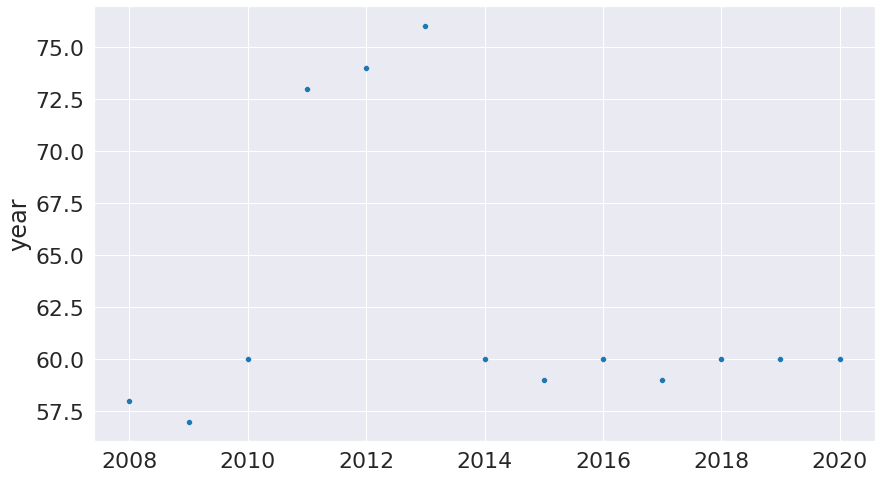

In [34]:
fig,ax = plt.subplots(figsize=(14,8))
sns.scatterplot(x=year.index,y=year)

<AxesSubplot:ylabel='Density'>

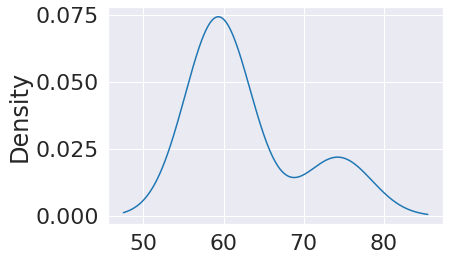

In [41]:
matches['year'].value_counts().plot.kde()

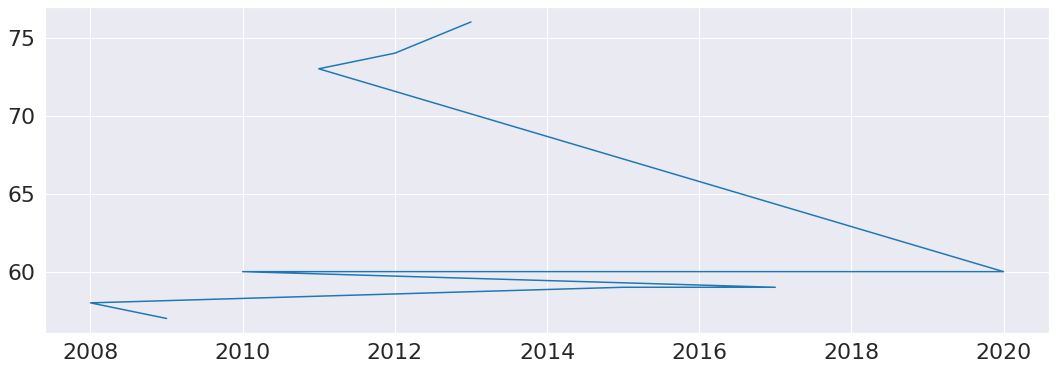

In [108]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(year.index,year)

### **How many matches arrages in which venue**

In [24]:
matches['venue'].value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

### **Top match winner team in 2012**

In [25]:
matches[matches['year']==2012]['winner'].value_counts()

Kolkata Knight Riders          12
Delhi Daredevils               11
Mumbai Indians                 10
Chennai Super Kings            10
Royal Challengers Bangalore     8
Kings XI Punjab                 8
Rajasthan Royals                7
Pune Warriors                   4
Deccan Chargers                 4
Name: winner, dtype: int64

### **Top eliminator team in IPL history**

In [26]:
matches[matches['eliminator']=='Y'][['team1','team2','winner','year']]

team1                        team2  \
66         Kolkata Knight Riders             Rajasthan Royals   
130          Chennai Super Kings              Kings XI Punjab   
328          Sunrisers Hyderabad  Royal Challengers Bangalore   
341  Royal Challengers Bangalore             Delhi Daredevils   
416        Kolkata Knight Riders             Rajasthan Royals   
476             Rajasthan Royals              Kings XI Punjab   
610                Gujarat Lions               Mumbai Indians   
705               Delhi Capitals        Kolkata Knight Riders   
746               Mumbai Indians          Sunrisers Hyderabad   
757               Delhi Capitals              Kings XI Punjab   
776        Kolkata Knight Riders          Sunrisers Hyderabad   
781               Mumbai Indians              Kings XI Punjab   
811  Royal Challengers Bangalore               Mumbai Indians   

                          winner  year  
66              Rajasthan Royals  2009  
130              Kings XI Punjab  2010  
328          Sunrisers Hyderabad  2013  
341  Royal Challengers Bangalore  2013  
416             Rajasthan Royals  2014  
476              Kings XI Punjab  2015  
610               Mumbai Indians  2017  
705               Delhi Capitals  2019  
746               Mumbai Indians  2019  
757               Delhi Capitals  2020  
776        Kolkata Knight Riders  2020  
781              Kings XI Punjab  2020  
811  Royal Challengers Bangalore  2020

In [27]:
def eliminatorTeam(df):
    if df['team1'] == df['winner']:
        return df['team1'] + " " +str(df['year'])
    return df['team2'] +  " " + str(df['year'])

In [28]:
matches[matches['eliminator']=='Y'][['team1','team2','winner','year']].apply(eliminatorTeam,axis=1)

66                Rajasthan Royals 2009
130                Kings XI Punjab 2010
328            Sunrisers Hyderabad 2013
341    Royal Challengers Bangalore 2013
416               Rajasthan Royals 2014
476                Kings XI Punjab 2015
610                 Mumbai Indians 2017
705                 Delhi Capitals 2019
746                 Mumbai Indians 2019
757                 Delhi Capitals 2020
776          Kolkata Knight Riders 2020
781                Kings XI Punjab 2020
811    Royal Challengers Bangalore 2020
dtype: object

In [29]:
matches[matches['eliminator']=='Y'][['team1','team2','winner','year']].apply(lambda xteam: xteam['team1'] if xteam['team1']==xteam['winner'] else xteam['team2'],axis=1)

66                Rajasthan Royals
130                Kings XI Punjab
328            Sunrisers Hyderabad
341    Royal Challengers Bangalore
416               Rajasthan Royals
476                Kings XI Punjab
610                 Mumbai Indians
705                 Delhi Capitals
746                 Mumbai Indians
757                 Delhi Capitals
776          Kolkata Knight Riders
781                Kings XI Punjab
811    Royal Challengers Bangalore
dtype: object

### **Change the data of month column. It will show the month name instead of month number**

In [30]:
month_name = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [31]:
matches['month'] = matches['month'].apply(lambda m: month_name[m])

In [32]:
matches.head()

id        city       date player_of_match  \
0  335982   Bangalore 2008-04-18     BB McCullum   
1  335983  Chandigarh 2008-04-19      MEK Hussey   
2  335984       Delhi 2008-04-19     MF Maharoof   
3  335985      Mumbai 2008-04-20      MV Boucher   
4  335986     Kolkata 2008-04-20       DJ Hussey   

                                        venue  neutral_venue  \
0                       M Chinnaswamy Stadium              0   
1  Punjab Cricket Association Stadium, Mohali              0   
2                            Feroz Shah Kotla              0   
3                            Wankhede Stadium              0   
4                                Eden Gardens              0   

                         team1                        team2  \
0  Royal Challengers Bangalore        Kolkata Knight Riders   
1              Kings XI Punjab          Chennai Super Kings   
2             Delhi Daredevils             Rajasthan Royals   
3               Mumbai Indians  Royal Challengers Bangalore   
4        Kolkata Knight Riders              Deccan Chargers   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field        Kolkata Knight Riders   
1          Chennai Super Kings           bat          Chennai Super Kings   
2             Rajasthan Royals           bat             Delhi Daredevils   
3               Mumbai Indians           bat  Royal Challengers Bangalore   
4              Deccan Chargers           bat        Kolkata Knight Riders   

    result  result_margin eliminator method    umpire1         umpire2  month  \
0     runs          140.0          N    NaN  Asad Rauf     RE Koertzen  April   
1     runs           33.0          N    NaN  MR Benson      SL Shastri  April   
2  wickets            9.0          N    NaN  Aleem Dar  GA Pratapkumar  April   
3  wickets            5.0          N    NaN   SJ Davis       DJ Harper  April   
4  wickets            5.0          N    NaN  BF Bowden     K Hariharan  April   

   year  
0  2008  
1  2008  
2  2008  
3  2008  
4  2008

### **Remove the nan value from city column**

In [33]:
matches['city'].fillna('No City Mentioned', inplace=True)

### **Change the index and create multi-index or hierarchy [year, city and venue]**

In [34]:
matches.set_index(['year','city','venue'], inplace=True)

In [35]:
matches.drop('id', axis=1, inplace=True)

In [36]:
matches

date  \
year city       venue                                                   
2008 Bangalore  M Chinnaswamy Stadium                      2008-04-18   
     Chandigarh Punjab Cricket Association Stadium, Mohali 2008-04-19   
     Delhi      Feroz Shah Kotla                           2008-04-19   
     Mumbai     Wankhede Stadium                           2008-04-20   
     Kolkata    Eden Gardens                               2008-04-20   
...                                                               ...   
2020 Dubai      Dubai International Cricket Stadium        2020-09-28   
                Dubai International Cricket Stadium        2020-11-05   
     Abu Dhabi  Sheikh Zayed Stadium                       2020-11-06   
                Sheikh Zayed Stadium                       2020-11-08   
     Dubai      Dubai International Cricket Stadium        2020-11-10   

                                                           player_of_match  \
year city       venue                                                        
2008 Bangalore  M Chinnaswamy Stadium                          BB McCullum   
     Chandigarh Punjab Cricket Association Stadium, Mohali      MEK Hussey   
     Delhi      Feroz Shah Kotla                               MF Maharoof   
     Mumbai     Wankhede Stadium                                MV Boucher   
     Kolkata    Eden Gardens                                     DJ Hussey   
...                                                                    ...   
2020 Dubai      Dubai International Cricket Stadium         AB de Villiers   
                Dubai International Cricket Stadium              JJ Bumrah   
     Abu Dhabi  Sheikh Zayed Stadium                         KS Williamson   
                Sheikh Zayed Stadium                            MP Stoinis   
     Dubai      Dubai International Cricket Stadium               TA Boult   

                                                            neutral_venue  \
year city       venue                                                       
2008 Bangalore  M Chinnaswamy Stadium                                   0   
     Chandigarh Punjab Cricket Association Stadium, Mohali              0   
     Delhi      Feroz Shah Kotla                                        0   
     Mumbai     Wankhede Stadium                                        0   
     Kolkata    Eden Gardens                                            0   
...                                                                   ...   
2020 Dubai      Dubai International Cricket Stadium                     0   
                Dubai International Cricket Stadium                     0   
     Abu Dhabi  Sheikh Zayed Stadium                                    0   
                Sheikh Zayed Stadium                                    0   
     Dubai      Dubai International Cricket Stadium                     0   

                                                                                  team1  \
year city       venue                                                                     
2008 Bangalore  M Chinnaswamy Stadium                       Royal Challengers Bangalore   
     Chandigarh Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
     Delhi      Feroz Shah Kotla                                       Delhi Daredevils   
     Mumbai     Wankhede Stadium                                         Mumbai Indians   
     Kolkata    Eden Gardens                                      Kolkata Knight Riders   
...                                                                                 ...   
2020 Dubai      Dubai International Cricket Stadium         Royal Challengers Bangalore   
                Dubai International Cricket Stadium                      Mumbai Indians   
     Abu Dhabi  Sheikh Zayed Stadium                        Royal Challengers Bangalore   
                Sheikh Zayed Stadium                                     Delhi Capitals   
     D

### **Find the list of Neutral Venue**

In [37]:
matches[matches['neutral_venue']==1]

date  \
year city              venue                                            
2009 Cape Town         Newlands                            2009-04-18   
                       Newlands                            2009-04-18   
                       Newlands                            2009-04-19   
                       Newlands                            2009-04-19   
     Port Elizabeth    St George's Park                    2009-04-20   
...                                                               ...   
2014 No City Mentioned Sharjah Cricket Stadium             2014-04-27   
                       Sharjah Cricket Stadium             2014-04-27   
                       Dubai International Cricket Stadium 2014-04-28   
     Abu Dhabi         Sheikh Zayed Stadium                2014-04-29   
     No City Mentioned Dubai International Cricket Stadium 2014-04-30   

                                                           player_of_match  \
year city              venue                                                 
2009 Cape Town         Newlands                               SR Tendulkar   
                       Newlands                                   R Dravid   
                       Newlands                                 DL Vettori   
                       Newlands                                   RP Singh   
     Port Elizabeth    St George's Park                     M Muralitharan   
...                                                                    ...   
2014 No City Mentioned Sharjah Cricket Stadium                     M Vijay   
                       Sharjah Cricket Stadium                    DR Smith   
                       Dubai International Cricket Stadium  Sandeep Sharma   
     Abu Dhabi         Sheikh Zayed Stadium                    JP Faulkner   
     No City Mentioned Dubai International Cricket Stadium         B Kumar   

                                                            neutral_venue  \
year city              venue                                                
2009 Cape Town         Newlands                                         1   
                       Newlands                                         1   
                       Newlands                                         1   
                       Newlands                                         1   
     Port Elizabeth    St George's Park                                 1   
...                                                                   ...   
2014 No City Mentioned Sharjah Cricket Stadium                          1   
                       Sharjah Cricket Stadium                          1   
                       Dubai International Cricket Stadium              1   
     Abu Dhabi         Sheikh Zayed Stadium                             1   
     No City Mentioned Dubai International Cricket Stadium              1   

                                                                                  team1  \
year city              venue                                                              
2009 Cape Town         Newlands                                     Chennai Super Kings   
                       Newlands                             Royal Challengers Bangalore   
                       Newlands                                        Delhi Daredevils   
                       Newlands                                         Deccan Chargers   
     Port Elizabeth    St George's Park                     Royal Challengers Bangalore   
...                                                                                 ...   
2014 No City Mentioned Sharjah Cricket Stadium                         Delhi Daredevils   
                       Sharjah Cricket Stadium                      Sunrisers Hyderabad   
                       Dubai International Cricket Stadium              Kings XI Punjab   
     Abu Dhabi         Sheikh Zayed Stadium                       Kolkata Knight Riders   
     N

### **Top 5 most Player of The match**

In [38]:
matches['player_of_match'].value_counts().head(5)

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64

### **List all venues**

In [39]:
matches.index.levels[2]

Index(['Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park',
       'De Beers Diamond Oval', 'Dr DY Patil Sports Academy',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Dubai International Cricket Stadium', 'Eden Gardens',
       'Feroz Shah Kotla', 'Green Park',
       'Himachal Pradesh Cricket Association Stadium',
       'Holkar Cricket Stadium', 'JSCA International Stadium Complex',
       'Kingsmead', 'M Chinnaswamy Stadium', 'M.Chinnaswamy Stadium',
       'MA Chidambaram Stadium, Chepauk',
       'Maharashtra Cricket Association Stadium', 'Nehru Stadium',
       'New Wanderers Stadium', 'Newlands', 'OUTsurance Oval',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Punjab Cricket Association Stadium, Mohali',
       'Rajiv Gandhi International Stadium, Uppal',
       'Sardar Patel Stadium, Motera',
       'Saurashtra Cricket Association Stadium', 'Sawai Mansingh Stadium',
       'Shaheed Veer Narayan Singh International Stadium',


### **Grab the data based on year**

In [40]:
matches.xs(2008, level='year').head()

date  \
city       venue                                                   
Bangalore  M Chinnaswamy Stadium                      2008-04-18   
Chandigarh Punjab Cricket Association Stadium, Mohali 2008-04-19   
Delhi      Feroz Shah Kotla                           2008-04-19   
Mumbai     Wankhede Stadium                           2008-04-20   
Kolkata    Eden Gardens                               2008-04-20   

                                                      player_of_match  \
city       venue                                                        
Bangalore  M Chinnaswamy Stadium                          BB McCullum   
Chandigarh Punjab Cricket Association Stadium, Mohali      MEK Hussey   
Delhi      Feroz Shah Kotla                               MF Maharoof   
Mumbai     Wankhede Stadium                                MV Boucher   
Kolkata    Eden Gardens                                     DJ Hussey   

                                                       neutral_venue  \
city       venue                                                       
Bangalore  M Chinnaswamy Stadium                                   0   
Chandigarh Punjab Cricket Association Stadium, Mohali              0   
Delhi      Feroz Shah Kotla                                        0   
Mumbai     Wankhede Stadium                                        0   
Kolkata    Eden Gardens                                            0   

                                                                             team1  \
city       venue                                                                     
Bangalore  M Chinnaswamy Stadium                       Royal Challengers Bangalore   
Chandigarh Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
Delhi      Feroz Shah Kotla                                       Delhi Daredevils   
Mumbai     Wankhede Stadium                                         Mumbai Indians   
Kolkata    Eden Gardens                                      Kolkata Knight Riders   

                                                                             team2  \
city       venue                                                                     
Bangalore  M Chinnaswamy Stadium                             Kolkata Knight Riders   
Chandigarh Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
Delhi      Feroz Shah Kotla                                       Rajasthan Royals   
Mumbai     Wankhede Stadium                            Royal Challengers Bangalore   
Kolkata    Eden Gardens                                            Deccan Chargers   

                                                                       toss_winner  \
city       venue                                                                     
Bangalore  M Chinnaswamy Stadium                       Royal Challengers Bangalore   
Chandigarh Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
Delhi      Feroz Shah Kotla                                       Rajasthan Royals   
Mumbai     Wankhede Stadium                                         Mumbai Indians   
Kolkata    Eden Gardens                                            Deccan Chargers   

                                                      toss_decision  \
city       venue                                                      
Bangalore  M Chinnaswamy Stadium                              field   
Chandigarh Punjab Cricket Association Stadium, Mohali           bat   
Delhi      Feroz Shah Kotla                                     bat   
Mumbai     Wankhede Stadium                                     bat   
Kolkata    Eden Gardens                                         bat   

                                                                            winner  \
city       venue                                                                     
Bangalore  M Chinnaswamy Stadium                             Kolkata Knight Riders   
C

In [41]:
matches.xs(2009, level='year').head()

date player_of_match  neutral_venue  \
city           venue                                                        
Cape Town      Newlands         2009-04-18    SR Tendulkar              1   
               Newlands         2009-04-18        R Dravid              1   
               Newlands         2009-04-19      DL Vettori              1   
               Newlands         2009-04-19        RP Singh              1   
Port Elizabeth St George's Park 2009-04-20  M Muralitharan              1   

                                                       team1  \
city           venue                                           
Cape Town      Newlands                  Chennai Super Kings   
               Newlands          Royal Challengers Bangalore   
               Newlands                     Delhi Daredevils   
               Newlands                      Deccan Chargers   
Port Elizabeth St George's Park  Royal Challengers Bangalore   

                                                 team2  \
city           venue                                     
Cape Town      Newlands                 Mumbai Indians   
               Newlands               Rajasthan Royals   
               Newlands                Kings XI Punjab   
               Newlands          Kolkata Knight Riders   
Port Elizabeth St George's Park    Chennai Super Kings   

                                                 toss_winner toss_decision  \
city           venue                                                         
Cape Town      Newlands                  Chennai Super Kings         field   
               Newlands          Royal Challengers Bangalore           bat   
               Newlands                     Delhi Daredevils         field   
               Newlands                Kolkata Knight Riders           bat   
Port Elizabeth St George's Park          Chennai Super Kings           bat   

                                                      winner   result  \
city           venue                                                    
Cape Town      Newlands                       Mumbai Indians     runs   
               Newlands          Royal Challengers Bangalore     runs   
               Newlands                     Delhi Daredevils  wickets   
               Newlands                      Deccan Chargers  wickets   
Port Elizabeth St George's Park          Chennai Super Kings     runs   

                                 result_margin eliminator method      umpire1  \
city           venue                                                            
Cape Town      Newlands                   19.0          N    NaN  BR Doctrove   
               Newlands                   75.0          N    NaN  BR Doctrove   
               Newlands                   10.0          N    D/L    MR Benson   
               Newlands                    8.0          N    NaN    MR Benson   
Port Elizabeth St George's Park           92.0          N    NaN   BG Jerling   

                                     umpire2  month  
city           venue                                 
Cape Town      Newlands          K Hariharan  April  
               Newlands            RB Tiffin  April  
               Newlands            SD Ranade  April  
               Newlands          BR Doctrove  April  
Port Elizabeth St George's Park   SJA Taufel  April

In [42]:
matches.xs(2010, level='year').head()

date  \
city       venue                                                   
Mumbai     Dr DY Patil Sports Academy                 2010-03-12   
           Brabourne Stadium                          2010-03-13   
Chandigarh Punjab Cricket Association Stadium, Mohali 2010-03-13   
Kolkata    Eden Gardens                               2010-03-14   
Chennai    MA Chidambaram Stadium, Chepauk            2010-03-14   

                                                      player_of_match  \
city       venue                                                        
Mumbai     Dr DY Patil Sports Academy                      AD Mathews   
           Brabourne Stadium                                YK Pathan   
Chandigarh Punjab Cricket Association Stadium, Mohali       G Gambhir   
Kolkata    Eden Gardens                                     MK Tiwary   
Chennai    MA Chidambaram Stadium, Chepauk                 WPUJC Vaas   

                                                       neutral_venue  \
city       venue                                                       
Mumbai     Dr DY Patil Sports Academy                              0   
           Brabourne Stadium                                       0   
Chandigarh Punjab Cricket Association Stadium, Mohali              0   
Kolkata    Eden Gardens                                            0   
Chennai    MA Chidambaram Stadium, Chepauk                         0   

                                                                       team1  \
city       venue                                                               
Mumbai     Dr DY Patil Sports Academy                        Deccan Chargers   
           Brabourne Stadium                                  Mumbai Indians   
Chandigarh Punjab Cricket Association Stadium, Mohali        Kings XI Punjab   
Kolkata    Eden Gardens                                Kolkata Knight Riders   
Chennai    MA Chidambaram Stadium, Chepauk               Chennai Super Kings   

                                                                             team2  \
city       venue                                                                     
Mumbai     Dr DY Patil Sports Academy                        Kolkata Knight Riders   
           Brabourne Stadium                                      Rajasthan Royals   
Chandigarh Punjab Cricket Association Stadium, Mohali             Delhi Daredevils   
Kolkata    Eden Gardens                                Royal Challengers Bangalore   
Chennai    MA Chidambaram Stadium, Chepauk                         Deccan Chargers   

                                                                 toss_winner  \
city       venue                                                               
Mumbai     Dr DY Patil Sports Academy                        Deccan Chargers   
           Brabourne Stadium                                  Mumbai Indians   
Chandigarh Punjab Cricket Association Stadium, Mohali       Delhi Daredevils   
Kolkata    Eden Gardens                                Kolkata Knight Riders   
Chennai    MA Chidambaram Stadium, Chepauk                   Deccan Chargers   

                                                      toss_decision  \
city       venue                                                      
Mumbai     Dr DY Patil Sports Academy                         field   
           Brabourne Stadium                                    bat   
Chandigarh Punjab Cricket Association Stadium, Mohali         field   
Kolkata    Eden Gardens                                       field   
Chennai    MA Chidambaram Stadium, Chepauk                      bat   

                                                                      winner  \
city       venue                                                               
Mumbai     Dr DY Patil Sports Academy                  Kolkata Knight Riders   
           Brabourne Stadium                                  Mumbai Indians   
Chandigarh Punjab Crick

In [43]:
matches.xs(2011, level='year').head()

date  \
city      venue                                                  
Chennai   MA Chidambaram Stadium, Chepauk           2011-04-08   
Hyderabad Rajiv Gandhi International Stadium, Uppal 2011-04-09   
Kochi     Nehru Stadium                             2011-04-09   
Delhi     Feroz Shah Kotla                          2011-04-10   
Mumbai    Dr DY Patil Sports Academy                2011-04-10   

                                                    player_of_match  \
city      venue                                                       
Chennai   MA Chidambaram Stadium, Chepauk                S Anirudha   
Hyderabad Rajiv Gandhi International Stadium, Uppal      SK Trivedi   
Kochi     Nehru Stadium                              AB de Villiers   
Delhi     Feroz Shah Kotla                               SL Malinga   
Mumbai    Dr DY Patil Sports Academy                        SB Wagh   

                                                     neutral_venue  \
city      venue                                                      
Chennai   MA Chidambaram Stadium, Chepauk                        0   
Hyderabad Rajiv Gandhi International Stadium, Uppal              0   
Kochi     Nehru Stadium                                          0   
Delhi     Feroz Shah Kotla                                       0   
Mumbai    Dr DY Patil Sports Academy                             0   

                                                                    team1  \
city      venue                                                             
Chennai   MA Chidambaram Stadium, Chepauk             Chennai Super Kings   
Hyderabad Rajiv Gandhi International Stadium, Uppal       Deccan Chargers   
Kochi     Nehru Stadium                              Kochi Tuskers Kerala   
Delhi     Feroz Shah Kotla                               Delhi Daredevils   
Mumbai    Dr DY Patil Sports Academy                        Pune Warriors   

                                                                           team2  \
city      venue                                                                    
Chennai   MA Chidambaram Stadium, Chepauk                  Kolkata Knight Riders   
Hyderabad Rajiv Gandhi International Stadium, Uppal             Rajasthan Royals   
Kochi     Nehru Stadium                              Royal Challengers Bangalore   
Delhi     Feroz Shah Kotla                                        Mumbai Indians   
Mumbai    Dr DY Patil Sports Academy                             Kings XI Punjab   

                                                              toss_winner  \
city      venue                                                             
Chennai   MA Chidambaram Stadium, Chepauk             Chennai Super Kings   
Hyderabad Rajiv Gandhi International Stadium, Uppal      Rajasthan Royals   
Kochi     Nehru Stadium                              Kochi Tuskers Kerala   
Delhi     Feroz Shah Kotla                               Delhi Daredevils   
Mumbai    Dr DY Patil Sports Academy                      Kings XI Punjab   

                                                    toss_decision  \
city      venue                                                     
Chennai   MA Chidambaram Stadium, Chepauk                     bat   
Hyderabad Rajiv Gandhi International Stadium, Uppal         field   
Kochi     Nehru Stadium                                       bat   
Delhi     Feroz Shah Kotla                                    bat   
Mumbai    Dr DY Patil Sports Academy                          bat   

                                                                          winner  \
city      venue                                                                    
Chennai   MA Chidambaram Stadium, Chepauk                    Chennai Super Kings   
Hyderabad Rajiv Gandhi International Stadium, Uppal             Rajasthan Royals   
Kochi     Nehru Stadium                              Royal Challengers Bangalore   
Delhi     Feroz Shah Kotla       

In [44]:
matches.xs(2012, level='year').head()

date player_of_match  \
city      venue                                                        
Chennai   MA Chidambaram Stadium, Chepauk 2012-04-04         RE Levi   
Kolkata   Eden Gardens                    2012-04-05       IK Pathan   
Mumbai    Wankhede Stadium                2012-04-06       SPD Smith   
Jaipur    Sawai Mansingh Stadium          2012-04-06       AM Rahane   
Bangalore M Chinnaswamy Stadium           2012-04-07  AB de Villiers   

                                           neutral_venue  \
city      venue                                            
Chennai   MA Chidambaram Stadium, Chepauk              0   
Kolkata   Eden Gardens                                 0   
Mumbai    Wankhede Stadium                             0   
Jaipur    Sawai Mansingh Stadium                       0   
Bangalore M Chinnaswamy Stadium                        0   

                                                                 team1  \
city      venue                                                          
Chennai   MA Chidambaram Stadium, Chepauk          Chennai Super Kings   
Kolkata   Eden Gardens                           Kolkata Knight Riders   
Mumbai    Wankhede Stadium                              Mumbai Indians   
Jaipur    Sawai Mansingh Stadium                      Rajasthan Royals   
Bangalore M Chinnaswamy Stadium            Royal Challengers Bangalore   

                                                      team2       toss_winner  \
city      venue                                                                 
Chennai   MA Chidambaram Stadium, Chepauk    Mumbai Indians    Mumbai Indians   
Kolkata   Eden Gardens                     Delhi Daredevils  Delhi Daredevils   
Mumbai    Wankhede Stadium                    Pune Warriors    Mumbai Indians   
Jaipur    Sawai Mansingh Stadium            Kings XI Punjab   Kings XI Punjab   
Bangalore M Chinnaswamy Stadium            Delhi Daredevils  Delhi Daredevils   

                                          toss_decision  \
city      venue                                           
Chennai   MA Chidambaram Stadium, Chepauk         field   
Kolkata   Eden Gardens                            field   
Mumbai    Wankhede Stadium                        field   
Jaipur    Sawai Mansingh Stadium                  field   
Bangalore M Chinnaswamy Stadium                   field   

                                                                winner  \
city      venue                                                          
Chennai   MA Chidambaram Stadium, Chepauk               Mumbai Indians   
Kolkata   Eden Gardens                                Delhi Daredevils   
Mumbai    Wankhede Stadium                               Pune Warriors   
Jaipur    Sawai Mansingh Stadium                      Rajasthan Royals   
Bangalore M Chinnaswamy Stadium            Royal Challengers Bangalore   

                                            result  result_margin eliminator  \
city      venue                                                                
Chennai   MA Chidambaram Stadium, Chepauk  wickets            8.0          N   
Kolkata   Eden Gardens                     wickets            8.0          N   
Mumbai    Wankhede Stadium                    runs           28.0          N   
Jaipur    Sawai Mansingh Stadium              runs           31.0          N   
Bangalore M Chinnaswamy Stadium               runs           20.0          N   

                                          method       umpire1  \
city      venue                                                  
Chennai   MA Chidambaram Stadium, Chepauk    NaN     JD Cloete   
Kolkata   Eden Gardens                       NaN      S Asnani   
Mumbai    Wankhede Stadium                   NaN  AK Chaudhary   
Jaipur    Sawai Mansingh Stadium             NaN     BF Bowden   
Bangalore M Chinnaswamy Stadium              NaN      S Asnani   

                                                   umpire2  month  
city      

In [45]:
matches.xs(2013, level='year').head()

date  \
city      venue                                                  
Kolkata   Eden Gardens                              2013-04-03   
Bangalore M Chinnaswamy Stadium                     2013-04-04   
Hyderabad Rajiv Gandhi International Stadium, Uppal 2013-04-05   
Delhi     Feroz Shah Kotla                          2013-04-06   
Chennai   MA Chidambaram Stadium, Chepauk           2013-04-06   

                                                    player_of_match  \
city      venue                                                       
Kolkata   Eden Gardens                                    SP Narine   
Bangalore M Chinnaswamy Stadium                            CH Gayle   
Hyderabad Rajiv Gandhi International Stadium, Uppal        A Mishra   
Delhi     Feroz Shah Kotla                                 R Dravid   
Chennai   MA Chidambaram Stadium, Chepauk                KA Pollard   

                                                     neutral_venue  \
city      venue                                                      
Kolkata   Eden Gardens                                           0   
Bangalore M Chinnaswamy Stadium                                  0   
Hyderabad Rajiv Gandhi International Stadium, Uppal              0   
Delhi     Feroz Shah Kotla                                       0   
Chennai   MA Chidambaram Stadium, Chepauk                        0   

                                                                           team1  \
city      venue                                                                    
Kolkata   Eden Gardens                                     Kolkata Knight Riders   
Bangalore M Chinnaswamy Stadium                      Royal Challengers Bangalore   
Hyderabad Rajiv Gandhi International Stadium, Uppal          Sunrisers Hyderabad   
Delhi     Feroz Shah Kotla                                      Delhi Daredevils   
Chennai   MA Chidambaram Stadium, Chepauk                    Chennai Super Kings   

                                                                team2  \
city      venue                                                         
Kolkata   Eden Gardens                               Delhi Daredevils   
Bangalore M Chinnaswamy Stadium                        Mumbai Indians   
Hyderabad Rajiv Gandhi International Stadium, Uppal     Pune Warriors   
Delhi     Feroz Shah Kotla                           Rajasthan Royals   
Chennai   MA Chidambaram Stadium, Chepauk              Mumbai Indians   

                                                               toss_winner  \
city      venue                                                              
Kolkata   Eden Gardens                               Kolkata Knight Riders   
Bangalore M Chinnaswamy Stadium                             Mumbai Indians   
Hyderabad Rajiv Gandhi International Stadium, Uppal          Pune Warriors   
Delhi     Feroz Shah Kotla                                Rajasthan Royals   
Chennai   MA Chidambaram Stadium, Chepauk                   Mumbai Indians   

                                                    toss_decision  \
city      venue                                                     
Kolkata   Eden Gardens                                      field   
Bangalore M Chinnaswamy Stadium                             field   
Hyderabad Rajiv Gandhi International Stadium, Uppal         field   
Delhi     Feroz Shah Kotla                                    bat   
Chennai   MA Chidambaram Stadium, Chepauk                     bat   

                                                                          winner  \
city      venue                                                                    
Kolkata   Eden Gardens                                     Kolkata Knight Riders   
Bangalore M Chinnaswamy Stadium                      Royal Challengers Bangalore   
Hyderabad Rajiv Gandhi International Stadium, Uppal          Sunrisers Hyderabad   
Delhi     Feroz Shah Kotla                            

In [46]:
matches.xs(2014, level='year').head()

date  \
city              venue                                            
Abu Dhabi         Sheikh Zayed Stadium                2014-04-16   
No City Mentioned Sharjah Cricket Stadium             2014-04-17   
Abu Dhabi         Sheikh Zayed Stadium                2014-04-18   
                  Sheikh Zayed Stadium                2014-04-18   
No City Mentioned Dubai International Cricket Stadium 2014-04-19   

                                                      player_of_match  \
city              venue                                                 
Abu Dhabi         Sheikh Zayed Stadium                      JH Kallis   
No City Mentioned Sharjah Cricket Stadium                   YS Chahal   
Abu Dhabi         Sheikh Zayed Stadium                     GJ Maxwell   
                  Sheikh Zayed Stadium                      AM Rahane   
No City Mentioned Dubai International Cricket Stadium        PA Patel   

                                                       neutral_venue  \
city              venue                                                
Abu Dhabi         Sheikh Zayed Stadium                             1   
No City Mentioned Sharjah Cricket Stadium                          1   
Abu Dhabi         Sheikh Zayed Stadium                             1   
                  Sheikh Zayed Stadium                             1   
No City Mentioned Dubai International Cricket Stadium              1   

                                                                             team1  \
city              venue                                                              
Abu Dhabi         Sheikh Zayed Stadium                              Mumbai Indians   
No City Mentioned Sharjah Cricket Stadium                         Delhi Daredevils   
Abu Dhabi         Sheikh Zayed Stadium                         Chennai Super Kings   
                  Sheikh Zayed Stadium                         Sunrisers Hyderabad   
No City Mentioned Dubai International Cricket Stadium  Royal Challengers Bangalore   

                                                                             team2  \
city              venue                                                              
Abu Dhabi         Sheikh Zayed Stadium                       Kolkata Knight Riders   
No City Mentioned Sharjah Cricket Stadium              Royal Challengers Bangalore   
Abu Dhabi         Sheikh Zayed Stadium                             Kings XI Punjab   
                  Sheikh Zayed Stadium                            Rajasthan Royals   
No City Mentioned Dubai International Cricket Stadium               Mumbai Indians   

                                                                       toss_winner  \
city              venue                                                              
Abu Dhabi         Sheikh Zayed Stadium                       Kolkata Knight Riders   
No City Mentioned Sharjah Cricket Stadium              Royal Challengers Bangalore   
Abu Dhabi         Sheikh Zayed Stadium                         Chennai Super Kings   
                  Sheikh Zayed Stadium                            Rajasthan Royals   
No City Mentioned Dubai International Cricket Stadium  Royal Challengers Bangalore   

                                                      toss_decision  \
city              venue                                               
Abu Dhabi         Sheikh Zayed Stadium                          bat   
No City Mentioned Sharjah Cricket Stadium                     field   
Abu Dhabi         Sheikh Zayed Stadium                          bat   
                  Sheikh Zayed Stadium                        field   
No City Mentioned Dubai International Cricket Stadium         field   

                                                                            winner  \
city              venue                                                              
Abu Dhabi         Sheikh Zayed Stadium                       Kolkata Knight Riders   
N

In [47]:
matches.xs(2015, level='year').head()

date player_of_match  \
city    venue                                                                
Kolkata Eden Gardens                            2015-04-08        M Morkel   
Chennai MA Chidambaram Stadium, Chepauk         2015-04-09         A Nehra   
Pune    Maharashtra Cricket Association Stadium 2015-04-10     JP Faulkner   
Chennai MA Chidambaram Stadium, Chepauk         2015-04-11     BB McCullum   
Kolkata Eden Gardens                            2015-04-11        CH Gayle   

                                                 neutral_venue  \
city    venue                                                    
Kolkata Eden Gardens                                         0   
Chennai MA Chidambaram Stadium, Chepauk                      0   
Pune    Maharashtra Cricket Association Stadium              0   
Chennai MA Chidambaram Stadium, Chepauk                      0   
Kolkata Eden Gardens                                         0   

                                                                 team1  \
city    venue                                                            
Kolkata Eden Gardens                             Kolkata Knight Riders   
Chennai MA Chidambaram Stadium, Chepauk            Chennai Super Kings   
Pune    Maharashtra Cricket Association Stadium        Kings XI Punjab   
Chennai MA Chidambaram Stadium, Chepauk            Chennai Super Kings   
Kolkata Eden Gardens                             Kolkata Knight Riders   

                                                                       team2  \
city    venue                                                                  
Kolkata Eden Gardens                                          Mumbai Indians   
Chennai MA Chidambaram Stadium, Chepauk                     Delhi Daredevils   
Pune    Maharashtra Cricket Association Stadium             Rajasthan Royals   
Chennai MA Chidambaram Stadium, Chepauk                  Sunrisers Hyderabad   
Kolkata Eden Gardens                             Royal Challengers Bangalore   

                                                                 toss_winner  \
city    venue                                                                  
Kolkata Eden Gardens                                   Kolkata Knight Riders   
Chennai MA Chidambaram Stadium, Chepauk                     Delhi Daredevils   
Pune    Maharashtra Cricket Association Stadium              Kings XI Punjab   
Chennai MA Chidambaram Stadium, Chepauk                  Chennai Super Kings   
Kolkata Eden Gardens                             Royal Challengers Bangalore   

                                                toss_decision  \
city    venue                                                   
Kolkata Eden Gardens                                    field   
Chennai MA Chidambaram Stadium, Chepauk                 field   
Pune    Maharashtra Cricket Association Stadium         field   
Chennai MA Chidambaram Stadium, Chepauk                   bat   
Kolkata Eden Gardens                                    field   

                                                                      winner  \
city    venue                                                                  
Kolkata Eden Gardens                                   Kolkata Knight Riders   
Chennai MA Chidambaram Stadium, Chepauk                  Chennai Super Kings   
Pune    Maharashtra Cricket Association Stadium             Rajasthan Royals   
Chennai MA Chidambaram Stadium, Chepauk                  Chennai Super Kings   
Kolkata Eden Gardens                             Royal Challengers Bangalore   

                                                  result  result_margin  \
city    venue                                                             
Kolkata Eden Gardens                             wickets            7.0   
Chennai MA Chidambaram Stadium, Chepauk             runs            1.0   
Pune    Maharashtra Cricket Association Stadium     runs           26.0   
Chennai MA 

In [48]:
matches.xs(2016, level='year').head()

date  \
city       venue                                                           
Mumbai     Wankhede Stadium                                   2016-04-09   
Kolkata    Eden Gardens                                       2016-04-10   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M... 2016-04-11   
Bangalore  M Chinnaswamy Stadium                              2016-04-12   
Kolkata    Eden Gardens                                       2016-04-13   

                                                              player_of_match  \
city       venue                                                                
Mumbai     Wankhede Stadium                                         AM Rahane   
Kolkata    Eden Gardens                                            AD Russell   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M...        AJ Finch   
Bangalore  M Chinnaswamy Stadium                               AB de Villiers   
Kolkata    Eden Gardens                                             RG Sharma   

                                                               neutral_venue  \
city       venue                                                               
Mumbai     Wankhede Stadium                                                0   
Kolkata    Eden Gardens                                                    0   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M...              0   
Bangalore  M Chinnaswamy Stadium                                           0   
Kolkata    Eden Gardens                                                    0   

                                                                                     team1  \
city       venue                                                                             
Mumbai     Wankhede Stadium                                                 Mumbai Indians   
Kolkata    Eden Gardens                                              Kolkata Knight Riders   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M...              Kings XI Punjab   
Bangalore  M Chinnaswamy Stadium                               Royal Challengers Bangalore   
Kolkata    Eden Gardens                                              Kolkata Knight Riders   

                                                                                 team2  \
city       venue                                                                         
Mumbai     Wankhede Stadium                                    Rising Pune Supergiants   
Kolkata    Eden Gardens                                               Delhi Daredevils   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M...            Gujarat Lions   
Bangalore  M Chinnaswamy Stadium                                   Sunrisers Hyderabad   
Kolkata    Eden Gardens                                                 Mumbai Indians   

                                                                         toss_winner  \
city       venue                                                                       
Mumbai     Wankhede Stadium                                           Mumbai Indians   
Kolkata    Eden Gardens                                        Kolkata Knight Riders   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M...          Gujarat Lions   
Bangalore  M Chinnaswamy Stadium                                 Sunrisers Hyderabad   
Kolkata    Eden Gardens                                               Mumbai Indians   

                                                              toss_decision  \
city       venue                                                              
Mumbai     Wankhede Stadium                                             bat   
Kolkata    Eden Gardens                                               field   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M...         field   
Bangalore  M Chinnaswamy Stadium                                      field   
Kolkata    Eden Gardens  

In [49]:
matches.xs(2017, level='year').head()

date  \
city      venue                                                  
Hyderabad Rajiv Gandhi International Stadium, Uppal 2017-04-05   
Pune      Maharashtra Cricket Association Stadium   2017-04-06   
Rajkot    Saurashtra Cricket Association Stadium    2017-04-07   
Indore    Holkar Cricket Stadium                    2017-04-08   
Bengaluru M.Chinnaswamy Stadium                     2017-04-08   

                                                    player_of_match  \
city      venue                                                       
Hyderabad Rajiv Gandhi International Stadium, Uppal    Yuvraj Singh   
Pune      Maharashtra Cricket Association Stadium         SPD Smith   
Rajkot    Saurashtra Cricket Association Stadium            CA Lynn   
Indore    Holkar Cricket Stadium                         GJ Maxwell   
Bengaluru M.Chinnaswamy Stadium                           KM Jadhav   

                                                     neutral_venue  \
city      venue                                                      
Hyderabad Rajiv Gandhi International Stadium, Uppal              0   
Pune      Maharashtra Cricket Association Stadium                0   
Rajkot    Saurashtra Cricket Association Stadium                 0   
Indore    Holkar Cricket Stadium                                 0   
Bengaluru M.Chinnaswamy Stadium                                  0   

                                                                           team1  \
city      venue                                                                    
Hyderabad Rajiv Gandhi International Stadium, Uppal          Sunrisers Hyderabad   
Pune      Maharashtra Cricket Association Stadium         Rising Pune Supergiant   
Rajkot    Saurashtra Cricket Association Stadium                   Gujarat Lions   
Indore    Holkar Cricket Stadium                                 Kings XI Punjab   
Bengaluru M.Chinnaswamy Stadium                      Royal Challengers Bangalore   

                                                                           team2  \
city      venue                                                                    
Hyderabad Rajiv Gandhi International Stadium, Uppal  Royal Challengers Bangalore   
Pune      Maharashtra Cricket Association Stadium                 Mumbai Indians   
Rajkot    Saurashtra Cricket Association Stadium           Kolkata Knight Riders   
Indore    Holkar Cricket Stadium                          Rising Pune Supergiant   
Bengaluru M.Chinnaswamy Stadium                                 Delhi Daredevils   

                                                                     toss_winner  \
city      venue                                                                    
Hyderabad Rajiv Gandhi International Stadium, Uppal  Royal Challengers Bangalore   
Pune      Maharashtra Cricket Association Stadium         Rising Pune Supergiant   
Rajkot    Saurashtra Cricket Association Stadium           Kolkata Knight Riders   
Indore    Holkar Cricket Stadium                                 Kings XI Punjab   
Bengaluru M.Chinnaswamy Stadium                      Royal Challengers Bangalore   

                                                    toss_decision  \
city      venue                                                     
Hyderabad Rajiv Gandhi International Stadium, Uppal         field   
Pune      Maharashtra Cricket Association Stadium           field   
Rajkot    Saurashtra Cricket Association Stadium            field   
Indore    Holkar Cricket Stadium                            field   
Bengaluru M.Chinnaswamy Stadium                               bat   

                                                                          winner  \
city      venue                                                                    
Hyderabad Rajiv Gandhi International Stadium, Uppal          Sunrisers Hyderabad   
Pune      Maharashtra Cricket Association Stadium         Rising Pune Supergiant   
Rajkot    Saurashtr

In [50]:
matches.xs(2018, level='year').head()

date  \
city       venue                                                           
Mumbai     Wankhede Stadium                                   2018-04-07   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M... 2018-04-08   
Kolkata    Eden Gardens                                       2018-04-08   
Hyderabad  Rajiv Gandhi International Stadium, Uppal          2018-04-09   
Chennai    MA Chidambaram Stadium, Chepauk                    2018-04-10   

                                                              player_of_match  \
city       venue                                                                
Mumbai     Wankhede Stadium                                          DJ Bravo   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M...        KL Rahul   
Kolkata    Eden Gardens                                             SP Narine   
Hyderabad  Rajiv Gandhi International Stadium, Uppal                 S Dhawan   
Chennai    MA Chidambaram Stadium, Chepauk                        SW Billings   

                                                               neutral_venue  \
city       venue                                                               
Mumbai     Wankhede Stadium                                                0   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M...              0   
Kolkata    Eden Gardens                                                    0   
Hyderabad  Rajiv Gandhi International Stadium, Uppal                       0   
Chennai    MA Chidambaram Stadium, Chepauk                                 0   

                                                                               team1  \
city       venue                                                                       
Mumbai     Wankhede Stadium                                           Mumbai Indians   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M...        Kings XI Punjab   
Kolkata    Eden Gardens                                        Kolkata Knight Riders   
Hyderabad  Rajiv Gandhi International Stadium, Uppal             Sunrisers Hyderabad   
Chennai    MA Chidambaram Stadium, Chepauk                       Chennai Super Kings   

                                                                                     team2  \
city       venue                                                                             
Mumbai     Wankhede Stadium                                            Chennai Super Kings   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M...             Delhi Daredevils   
Kolkata    Eden Gardens                                        Royal Challengers Bangalore   
Hyderabad  Rajiv Gandhi International Stadium, Uppal                      Rajasthan Royals   
Chennai    MA Chidambaram Stadium, Chepauk                           Kolkata Knight Riders   

                                                                         toss_winner  \
city       venue                                                                       
Mumbai     Wankhede Stadium                                      Chennai Super Kings   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M...        Kings XI Punjab   
Kolkata    Eden Gardens                                        Kolkata Knight Riders   
Hyderabad  Rajiv Gandhi International Stadium, Uppal             Sunrisers Hyderabad   
Chennai    MA Chidambaram Stadium, Chepauk                       Chennai Super Kings   

                                                              toss_decision  \
city       venue                                                              
Mumbai     Wankhede Stadium                                           field   
Chandigarh Punjab Cricket Association IS Bindra Stadium, M...         field   
Kolkata    Eden Gardens                                               field   
Hyderabad  Rajiv Gandhi International Stadium, Uppal                  field   
Chennai    MA Chidambaram Stadium, Chep

In [51]:
matches.xs(2019, level='year').head()

date  player_of_match  \
city    venue                                                         
Chennai MA Chidambaram Stadium, Chepauk 2019-03-23  Harbhajan Singh   
Kolkata Eden Gardens                    2019-03-24       AD Russell   
Mumbai  Wankhede Stadium                2019-03-24          RR Pant   
Jaipur  Sawai Mansingh Stadium          2019-03-25         CH Gayle   
Delhi   Feroz Shah Kotla                2019-03-26        SR Watson   

                                         neutral_venue                  team1  \
city    venue                                                                   
Chennai MA Chidambaram Stadium, Chepauk              0    Chennai Super Kings   
Kolkata Eden Gardens                                 0  Kolkata Knight Riders   
Mumbai  Wankhede Stadium                             0         Mumbai Indians   
Jaipur  Sawai Mansingh Stadium                       0       Rajasthan Royals   
Delhi   Feroz Shah Kotla                             0         Delhi Capitals   

                                                               team2  \
city    venue                                                          
Chennai MA Chidambaram Stadium, Chepauk  Royal Challengers Bangalore   
Kolkata Eden Gardens                             Sunrisers Hyderabad   
Mumbai  Wankhede Stadium                              Delhi Capitals   
Jaipur  Sawai Mansingh Stadium                       Kings XI Punjab   
Delhi   Feroz Shah Kotla                         Chennai Super Kings   

                                                   toss_winner toss_decision  \
city    venue                                                                  
Chennai MA Chidambaram Stadium, Chepauk    Chennai Super Kings         field   
Kolkata Eden Gardens                     Kolkata Knight Riders         field   
Mumbai  Wankhede Stadium                        Mumbai Indians         field   
Jaipur  Sawai Mansingh Stadium                Rajasthan Royals         field   
Delhi   Feroz Shah Kotla                        Delhi Capitals           bat   

                                                        winner   result  \
city    venue                                                             
Chennai MA Chidambaram Stadium, Chepauk    Chennai Super Kings  wickets   
Kolkata Eden Gardens                     Kolkata Knight Riders  wickets   
Mumbai  Wankhede Stadium                        Delhi Capitals     runs   
Jaipur  Sawai Mansingh Stadium                 Kings XI Punjab     runs   
Delhi   Feroz Shah Kotla                   Chennai Super Kings  wickets   

                                         result_margin eliminator method  \
city    venue                                                              
Chennai MA Chidambaram Stadium, Chepauk            7.0          N    NaN   
Kolkata Eden Gardens                               6.0          N    NaN   
Mumbai  Wankhede Stadium                          37.0          N    NaN   
Jaipur  Sawai Mansingh Stadium                    14.0          N    NaN   
Delhi   Feroz Shah Kotla                           6.0          N    NaN   

                                                       umpire1        umpire2  \
city    venue                                                                   
Chennai MA Chidambaram Stadium, Chepauk            AY Dandekar   BNJ Oxenford   
Kolkata Eden Gardens                               CB Gaffaney   AK Chaudhary   
Mumbai  Wankhede Stadium                              YC Barde         S Ravi   
Jaipur  Sawai Mansingh Stadium           KN Ananthapadmanabhan  C Shamshuddin   
Delhi   Feroz Shah Kotla                             M Erasmus    Nitin Menon   

                                         month  
city    venue                                   
Chennai MA Chidambaram Stadium, Chepauk  March  
Kolkata Eden Gardens                     March  
Mumbai  Wankhede Stadium                 March  
Jaipur  Sawai Mansingh Stadium           M

In [52]:
matches.xs(2020, level='year').head()

date player_of_match  \
city      venue                                                            
Abu Dhabi Sheikh Zayed Stadium                2020-09-19       AT Rayudu   
Dubai     Dubai International Cricket Stadium 2020-09-20      MP Stoinis   
Abu Dhabi Sheikh Zayed Stadium                2020-10-21  Mohammed Siraj   
Sharjah   Sharjah Cricket Stadium             2020-11-03        S Nadeem   
          Sharjah Cricket Stadium             2020-09-22       SV Samson   

                                               neutral_venue  \
city      venue                                                
Abu Dhabi Sheikh Zayed Stadium                             0   
Dubai     Dubai International Cricket Stadium              0   
Abu Dhabi Sheikh Zayed Stadium                             0   
Sharjah   Sharjah Cricket Stadium                          0   
          Sharjah Cricket Stadium                          0   

                                                               team1  \
city      venue                                                        
Abu Dhabi Sheikh Zayed Stadium                        Mumbai Indians   
Dubai     Dubai International Cricket Stadium         Delhi Capitals   
Abu Dhabi Sheikh Zayed Stadium                 Kolkata Knight Riders   
Sharjah   Sharjah Cricket Stadium                     Mumbai Indians   
          Sharjah Cricket Stadium                   Rajasthan Royals   

                                                                     team2  \
city      venue                                                              
Abu Dhabi Sheikh Zayed Stadium                         Chennai Super Kings   
Dubai     Dubai International Cricket Stadium              Kings XI Punjab   
Abu Dhabi Sheikh Zayed Stadium                 Royal Challengers Bangalore   
Sharjah   Sharjah Cricket Stadium                      Sunrisers Hyderabad   
          Sharjah Cricket Stadium                      Chennai Super Kings   

                                                         toss_winner  \
city      venue                                                        
Abu Dhabi Sheikh Zayed Stadium                   Chennai Super Kings   
Dubai     Dubai International Cricket Stadium        Kings XI Punjab   
Abu Dhabi Sheikh Zayed Stadium                 Kolkata Knight Riders   
Sharjah   Sharjah Cricket Stadium                Sunrisers Hyderabad   
          Sharjah Cricket Stadium                Chennai Super Kings   

                                              toss_decision  \
city      venue                                               
Abu Dhabi Sheikh Zayed Stadium                        field   
Dubai     Dubai International Cricket Stadium         field   
Abu Dhabi Sheikh Zayed Stadium                          bat   
Sharjah   Sharjah Cricket Stadium                     field   
          Sharjah Cricket Stadium                     field   

                                                                    winner  \
city      venue                                                              
Abu Dhabi Sheikh Zayed Stadium                         Chennai Super Kings   
Dubai     Dubai International Cricket Stadium               Delhi Capitals   
Abu Dhabi Sheikh Zayed Stadium                 Royal Challengers Bangalore   
Sharjah   Sharjah Cricket Stadium                      Sunrisers Hyderabad   
          Sharjah Cricket Stadium                         Rajasthan Royals   

                                                result  result_margin  \
city      venue                                                         
Abu Dhabi Sheikh Zayed Stadium                 wickets            5.0   
Dubai     Dubai International Cricket Stadium      tie            NaN   
Abu Dhabi Sheikh Zayed Stadium                 wickets            8.0   
Sharjah   Sharjah Cricket Stadium              wickets           10.0   
          Sharjah Cricket Stadium                 runs           16.0   

            

### **Which player win the most top five player of match in 2008**

In [53]:
matches.xs(2008, level='year')['player_of_match'].value_counts().head()

SE Marsh        5
SR Watson       4
YK Pathan       4
SM Pollock      2
AC Gilchrist    2
Name: player_of_match, dtype: int64

# 

**Do the same things for other years**

In [54]:
matches.xs(2009, level='year')['player_of_match'].value_counts().head()

YK Pathan        3
SR Tendulkar     2
KC Sangakkara    2
MK Pandey        2
LRPL Taylor      2
Name: player_of_match, dtype: int64

In [55]:
matches.xs(2009, level='year')['player_of_match'].value_counts().head()

YK Pathan        3
SR Tendulkar     2
KC Sangakkara    2
MK Pandey        2
LRPL Taylor      2
Name: player_of_match, dtype: int64

In [56]:
matches.xs(2010, level='year')['player_of_match'].value_counts().head()

SR Tendulkar    4
JH Kallis       3
A Symonds       3
SC Ganguly      2
KP Pietersen    2
Name: player_of_match, dtype: int64

In [57]:
matches.xs(2011, level='year')['player_of_match'].value_counts().head()

CH Gayle      6
MEK Hussey    3
R Sharma      2
BJ Hodge      2
MM Patel      2
Name: player_of_match, dtype: int64

In [89]:
matches.xs(2012, level='year')['player_of_match'].value_counts().head()

CH Gayle     5
DW Steyn     3
V Sehwag     3
SP Narine    3
G Gambhir    3
Name: player_of_match, dtype: int64

In [87]:
matches.xs(2013, level='year')['player_of_match'].value_counts().head()

MEK Hussey    5
A Mishra      4
MS Dhoni      3
KA Pollard    3
AM Rahane     3
Name: player_of_match, dtype: int64

In [85]:
matches.xs(2014, level='year')['player_of_match'].value_counts().head()

GJ Maxwell        4
Sandeep Sharma    3
RA Jadeja         3
DR Smith          3
RV Uthappa        3
Name: player_of_match, dtype: int64

In [92]:
matches.xs(2015, level='year')['player_of_match'].value_counts().head()

DA Warner     4
A Nehra       3
AD Russell    3
AM Rahane     3
SK Raina      2
Name: player_of_match, dtype: int64

In [94]:
matches.xs(2016, level='year')['player_of_match'].value_counts().head()

V Kohli           5
AB de Villiers    4
RG Sharma         4
AJ Finch          3
DA Warner         3
Name: player_of_match, dtype: int64

In [63]:
matches.xs(2017, level='year')['player_of_match'].value_counts().head()

NM Coulter-Nile    3
BA Stokes          3
RV Uthappa         2
SP Narine          2
JD Unadkat         2
Name: player_of_match, dtype: int64

In [64]:
matches.xs(2018, level='year')['player_of_match'].value_counts().head()

Rashid Khan       4
SR Watson         3
AB de Villiers    3
JC Buttler        3
SP Narine         3
Name: player_of_match, dtype: int64

In [65]:
matches.xs(2019, level='year')['player_of_match'].value_counts().head()

AD Russell    4
MS Dhoni      3
RR Pant       3
JJ Bumrah     3
HH Pandya     3
Name: player_of_match, dtype: int64

In [66]:
matches.xs(2020, level='year')['player_of_match'].value_counts().head()

TA Boult          3
RD Gaikwad        3
AB de Villiers    3
KL Rahul          3
MP Stoinis        2
Name: player_of_match, dtype: int64

### **Grab the data for <i><u>CH Gayle</u></i> and <i><u>AB de Villiers</u></i>, when they won the player of match**

In [67]:
matches[(matches['player_of_match']=='AB de Villiers') | (matches['player_of_match']=='CH Gayle')]

date  \
year city         venue                                                           
2009 Durban       Kingsmead                                          2009-04-21   
                  Kingsmead                                          2009-04-23   
     Bloemfontein OUTsurance Oval                                    2009-05-17   
2011 Kochi        Nehru Stadium                                      2011-04-09   
     Kolkata      Eden Gardens                                       2011-04-22   
     Bangalore    M Chinnaswamy Stadium                              2011-05-06   
                  M Chinnaswamy Stadium                              2011-05-08   
                  M Chinnaswamy Stadium                              2011-05-14   
                  M Chinnaswamy Stadium                              2011-05-22   
     Chennai      MA Chidambaram Stadium, Chepauk                    2011-05-27   
2012 Bangalore    M Chinnaswamy Stadium                              2012-04-07   
                  M Chinnaswamy Stadium                              2012-04-17   
     Chandigarh   Punjab Cricket Association Stadium, Mohali         2012-04-20   
     Jaipur       Sawai Mansingh Stadium                             2012-04-23   
     Bangalore    M Chinnaswamy Stadium                              2012-05-06   
     Mumbai       Wankhede Stadium                                   2012-05-09   
     Pune         Subrata Roy Sahara Stadium                         2012-05-11   
     Delhi        Feroz Shah Kotla                                   2012-05-17   
2013 Bangalore    M Chinnaswamy Stadium                              2013-04-04   
                  M Chinnaswamy Stadium                              2013-04-11   
                  M Chinnaswamy Stadium                              2013-04-23   
     Pune         Subrata Roy Sahara Stadium                         2013-05-02   
2014 Bangalore    M Chinnaswamy Stadium                              2014-05-04   
     Ranchi       JSCA International Stadium Complex                 2014-05-18   
2015 Kolkata      Eden Gardens                                       2015-04-11   
     Bangalore    M Chinnaswamy Stadium                              2015-05-06   
     Mumbai       Wankhede Stadium                                   2015-05-10   
     Pune         Maharashtra Cricket Association Stadium            2015-05-20   
2016 Bangalore    M Chinnaswamy Stadium                              2016-04-12   
     Pune         Maharashtra Cricket Association Stadium            2016-04-22   
     Bangalore    M Chinnaswamy Stadium                              2016-05-14   
                  M Chinnaswamy Stadium                              2016-05-24   
2017 Rajkot       Saurashtra Cricket Association Stadium             2017-04-18   
2018 Chandigarh   Punjab Cricket Association IS Bindra Stadium, M... 2018-04-15   
                  Punjab Cricket Association IS Bindra Stadium, M... 2018-04-19   
     Bengaluru    M.Chinnaswamy Stadium                              2018-04-21   
     Delhi        Feroz Shah Kotla                                   2018-05-12   
     Bengaluru    M.Chinnaswamy Stadium                              2018-05-17   
2019 Jaipur       Sawai Mansingh Stadium                             2019-03-25   
     Chandigarh   Punjab Cricket Association IS Bindra Stadium, M... 2019-04-13   
     Bengaluru    M.Chinnaswamy Stadium                              2019-04-24   
2020 Sharjah      Sharjah Cricket Stadium                            2020-10-26   
     Dubai        Dubai International Cricket Stadium                2020-10-17   
     Sharjah      Sharjah Cricket Stadium                            2020-10-12   
     Dubai        Dubai International Cricket Stadium                2020-09-28   

                                                                     player_of_match  \
year city         venue                                                              

In [68]:
len(matches[matches['player_of_match']=='AB de Villiers']['player_of_match'])

23

In [69]:
len(matches[matches['player_of_match']=='CH Gayle']['player_of_match'])

22

### **In 2015, which umpires arrange the most matches**

In [74]:
matches.xs(2015,level='year')[['umpire1']].value_counts() 

umpire1        
AK Chaudhary       13
RK Illingworth      9
HDPK Dharmasena     8
JD Cloete           7
SD Fry              5
M Erasmus           4
CB Gaffaney         3
RM Deshpande        3
PG Pathak           2
S Ravi              2
C Shamshuddin       1
CK Nandan           1
VA Kulkarni         1
dtype: int64

In [75]:
matches.head()

date  \
year city       venue                                                   
2008 Bangalore  M Chinnaswamy Stadium                      2008-04-18   
     Chandigarh Punjab Cricket Association Stadium, Mohali 2008-04-19   
     Delhi      Feroz Shah Kotla                           2008-04-19   
     Mumbai     Wankhede Stadium                           2008-04-20   
     Kolkata    Eden Gardens                               2008-04-20   

                                                           player_of_match  \
year city       venue                                                        
2008 Bangalore  M Chinnaswamy Stadium                          BB McCullum   
     Chandigarh Punjab Cricket Association Stadium, Mohali      MEK Hussey   
     Delhi      Feroz Shah Kotla                               MF Maharoof   
     Mumbai     Wankhede Stadium                                MV Boucher   
     Kolkata    Eden Gardens                                     DJ Hussey   

                                                            neutral_venue  \
year city       venue                                                       
2008 Bangalore  M Chinnaswamy Stadium                                   0   
     Chandigarh Punjab Cricket Association Stadium, Mohali              0   
     Delhi      Feroz Shah Kotla                                        0   
     Mumbai     Wankhede Stadium                                        0   
     Kolkata    Eden Gardens                                            0   

                                                                                  team1  \
year city       venue                                                                     
2008 Bangalore  M Chinnaswamy Stadium                       Royal Challengers Bangalore   
     Chandigarh Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
     Delhi      Feroz Shah Kotla                                       Delhi Daredevils   
     Mumbai     Wankhede Stadium                                         Mumbai Indians   
     Kolkata    Eden Gardens                                      Kolkata Knight Riders   

                                                                                  team2  \
year city       venue                                                                     
2008 Bangalore  M Chinnaswamy Stadium                             Kolkata Knight Riders   
     Chandigarh Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
     Delhi      Feroz Shah Kotla                                       Rajasthan Royals   
     Mumbai     Wankhede Stadium                            Royal Challengers Bangalore   
     Kolkata    Eden Gardens                                            Deccan Chargers   

                                                                            toss_winner  \
year city       venue                                                                     
2008 Bangalore  M Chinnaswamy Stadium                       Royal Challengers Bangalore   
     Chandigarh Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
     Delhi      Feroz Shah Kotla                                       Rajasthan Royals   
     Mumbai     Wankhede Stadium                                         Mumbai Indians   
     Kolkata    Eden Gardens                                            Deccan Chargers   

                                                           toss_decision  \
year city       venue                                                      
2008 Bangalore  M Chinnaswamy Stadium                              field   
     Chandigarh Punjab Cricket Association Stadium, Mohali           bat   
     Delhi      Feroz Shah Kotla                                     bat   
     Mumbai     Wankhede Stadium                                     bat   
     Kolkata    Eden Gardens                                         bat   

                   

### **Show previous matches result <u><i>Kolkata Knight Riders</i></u> and <u><i>Kings XI Punjab</i></u>**

In [79]:
matches[((matches['team1'] == 'Kolkata Knight Riders') | (matches['team2'] == 'Kolkata Knight Riders')) & ((matches['team1'] == 'Kings XI Punjab') | (matches['team2'] == 'Kings XI Punjab'))][['team1','team2','winner','result','player_of_match']]

team1  \
year city           venue                                                                       
2008 Chandigarh     Punjab Cricket Association Stadium, Mohali                Kings XI Punjab   
     Kolkata        Eden Gardens                                        Kolkata Knight Riders   
2009 Durban         Kingsmead                                                 Kings XI Punjab   
     Port Elizabeth St George's Park                                          Kings XI Punjab   
2010 Chandigarh     Punjab Cricket Association Stadium, Mohali                Kings XI Punjab   
     Kolkata        Eden Gardens                                        Kolkata Knight Riders   
2011 Kolkata        Eden Gardens                                        Kolkata Knight Riders   
2012 Kolkata        Eden Gardens                                        Kolkata Knight Riders   
     Chandigarh     Punjab Cricket Association Stadium, Mohali                Kings XI Punjab   
2013 Chandigarh     Punjab Cricket Association Stadium, Mohali                Kings XI Punjab   
     Kolkata        Eden Gardens                                        Kolkata Knight Riders   
2014 Abu Dhabi      Sheikh Zayed Stadium                                Kolkata Knight Riders   
     Cuttack        Barabati Stadium                                          Kings XI Punjab   
     Kolkata        Eden Gardens                                              Kings XI Punjab   
     Bangalore      M Chinnaswamy Stadium                               Kolkata Knight Riders   
2015 Pune           Maharashtra Cricket Association Stadium                   Kings XI Punjab   
     Kolkata        Eden Gardens                                        Kolkata Knight Riders   
2016 Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...        Kings XI Punjab   
     Kolkata        Eden Gardens                                        Kolkata Knight Riders   
2017 Kolkata        Eden Gardens                                        Kolkata Knight Riders   
     Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...        Kings XI Punjab   
2018 Kolkata        Eden Gardens                                        Kolkata Knight Riders   
     Indore         Holkar Cricket Stadium                                    Kings XI Punjab   
2019 Kolkata        Eden Gardens                                        Kolkata Knight Riders   
     Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...        Kings XI Punjab   
2020 Sharjah        Sharjah Cricket Stadium                             Kolkata Knight Riders   
     Abu Dhabi      Sheikh Zayed Stadium                                Kolkata Knight Riders   

                                                                                        team2  \
year city           venue                                                                       
2008 Chandigarh     Punjab Cricket Association Stadium, Mohali          Kolkata Knight Riders   
     Kolkata        Eden Gardens                                              Kings XI Punjab   
2009 Durban         Kingsmead                                           Kolkata Knight Riders   
     Port Elizabeth St George's Park                                    Kolkata Knight Riders   
2010 Chandigarh     Punjab Cricket Association Stadium, Mohali          Kolkata Knight Riders   
     Kolkata        Eden Gardens                                              Kings XI Punjab   
2011 Kolkata        Eden Gardens                                              Kings XI Punjab   
2012 Kolkata        Eden Gardens                                              Kings XI Punjab   
     Chandigarh     Punjab Cricket Association Stadium, Mohali          Kolkata Knight Riders   
2013 Chandigarh     Punjab Cricket Association Stadium, Mohali          Kolkata Knight Riders   
     Kolkata        Eden Gardens                                              Kings XI Punjab   
2014 Abu Dhab

### **How many time <u><i>Shakib Al Hasan</i></u> and <u><i>Mustafizur Rahman</i></u> won the player of the match**

In [98]:
matches[(matches['player_of_match'] == 'Shakib Al Hasan') | (matches['player_of_match'] == 'Mustafizur Rahman')][['team1','team2','winner']]

team1  \
year city      venue                                                              
2012 Kolkata   Eden Gardens                               Kolkata Knight Riders   
     Pune      Subrata Roy Sahara Stadium                         Pune Warriors   
2016 Hyderabad Rajiv Gandhi International Stadium, Uppal    Sunrisers Hyderabad   

                                                                          team2  \
year city      venue                                                              
2012 Kolkata   Eden Gardens                                    Rajasthan Royals   
     Pune      Subrata Roy Sahara Stadium                 Kolkata Knight Riders   
2016 Hyderabad Rajiv Gandhi International Stadium, Uppal        Kings XI Punjab   

                                                                         winner  
year city      venue                                                             
2012 Kolkata   Eden Gardens                               Kolkata Knight Riders  
     Pune      Subrata Roy Sahara Stadium                 Kolkata Knight Riders  
2016 Hyderabad Rajiv Gandhi International Stadium, Uppal    Sunrisers Hyderabad

### **Which teams won the match after taking the bat second,though they won the toss**

In [113]:
matches[(matches['toss_winner']==matches['winner']) & (matches['toss_decision'] == 'field')]

date  \
year city      venue                                                  
2008 Hyderabad Rajiv Gandhi International Stadium, Uppal 2008-04-24   
     Bangalore M Chinnaswamy Stadium                     2008-04-26   
     Mumbai    Dr DY Patil Sports Academy                2008-04-27   
     Hyderabad Rajiv Gandhi International Stadium, Uppal 2008-05-01   
     Bangalore M Chinnaswamy Stadium                     2008-05-05   
...                                                             ...   
2020 Sharjah   Sharjah Cricket Stadium                   2020-09-27   
     Dubai     Dubai International Cricket Stadium       2020-10-31   
               Dubai International Cricket Stadium       2020-10-29   
     Abu Dhabi Sheikh Zayed Stadium                      2020-10-30   
               Sheikh Zayed Stadium                      2020-11-06   

                                                         player_of_match  \
year city      venue                                                       
2008 Hyderabad Rajiv Gandhi International Stadium, Uppal       YK Pathan   
     Bangalore M Chinnaswamy Stadium                           SR Watson   
     Mumbai    Dr DY Patil Sports Academy                   AC Gilchrist   
     Hyderabad Rajiv Gandhi International Stadium, Uppal        SE Marsh   
     Bangalore M Chinnaswamy Stadium                         S Sreesanth   
...                                                                  ...   
2020 Sharjah   Sharjah Cricket Stadium                         SV Samson   
     Dubai     Dubai International Cricket Stadium          Ishan Kishan   
               Dubai International Cricket Stadium            RD Gaikwad   
     Abu Dhabi Sheikh Zayed Stadium                            BA Stokes   
               Sheikh Zayed Stadium                        KS Williamson   

                                                          neutral_venue  \
year city      venue                                                      
2008 Hyderabad Rajiv Gandhi International Stadium, Uppal              0   
     Bangalore M Chinnaswamy Stadium                                  0   
     Mumbai    Dr DY Patil Sports Academy                             0   
     Hyderabad Rajiv Gandhi International Stadium, Uppal              0   
     Bangalore M Chinnaswamy Stadium                                  0   
...                                                                 ...   
2020 Sharjah   Sharjah Cricket Stadium                                0   
     Dubai     Dubai International Cricket Stadium                    0   
               Dubai International Cricket Stadium                    0   
     Abu Dhabi Sheikh Zayed Stadium                                   0   
               Sheikh Zayed Stadium                                   0   

                                                                                team1  \
year city      venue                                                                    
2008 Hyderabad Rajiv Gandhi International Stadium, Uppal              Deccan Chargers   
     Bangalore M Chinnaswamy Stadium                      Royal Challengers Bangalore   
     Mumbai    Dr DY Patil Sports Academy                              Mumbai Indians   
     Hyderabad Rajiv Gandhi International Stadium, Uppal              Deccan Chargers   
     Bangalore M Chinnaswamy Stadium                      Royal Challengers Bangalore   
...                                                                               ...   
2020 Sharjah   Sharjah Cricket Stadium                                Kings XI Punjab   
     Dubai     Dubai International Cricket Stadium                     Delhi Capitals   
               Dubai International Cricket Stadium              Kolkata Knight Riders   
     Abu Dhabi Sheikh Zayed Stadium                                   Kings XI Punjab   
               Sheikh Zayed Stadium                       Royal Challengers Bangalore   

                

### **Which team won the match most after taking the bat second,though they won the toss**

In [112]:
matches[(matches['toss_winner']==matches['winner']) & (matches['toss_decision'] == 'field')]['winner'].value_counts() 

Kolkata Knight Riders          38
Mumbai Indians                 34
Royal Challengers Bangalore    32
Kings XI Punjab                30
Chennai Super Kings            30
Rajasthan Royals               29
Delhi Daredevils               24
Sunrisers Hyderabad            19
Gujarat Lions                  10
Deccan Chargers                 8
Delhi Capitals                  7
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64